In [16]:
import numpy as np
from astropy.io import fits
import sep
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import rcParams

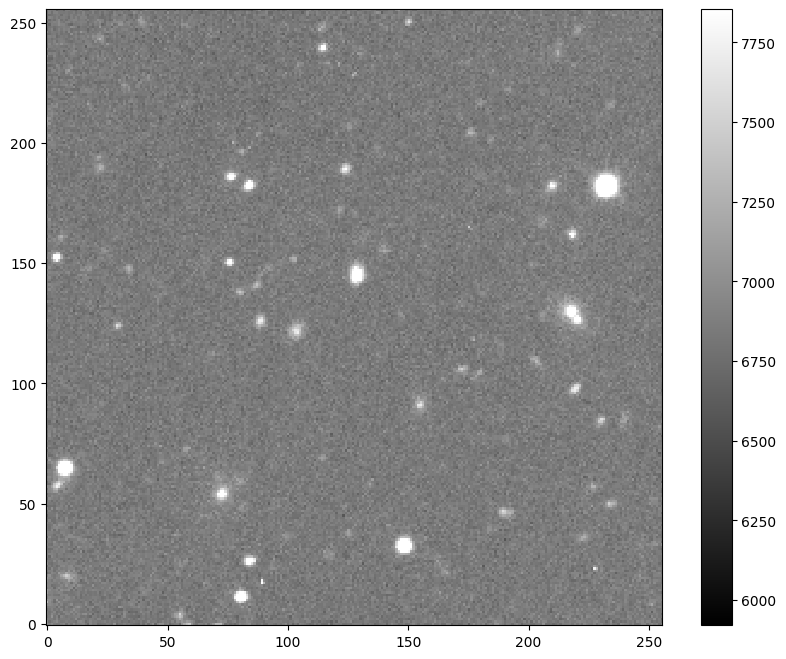

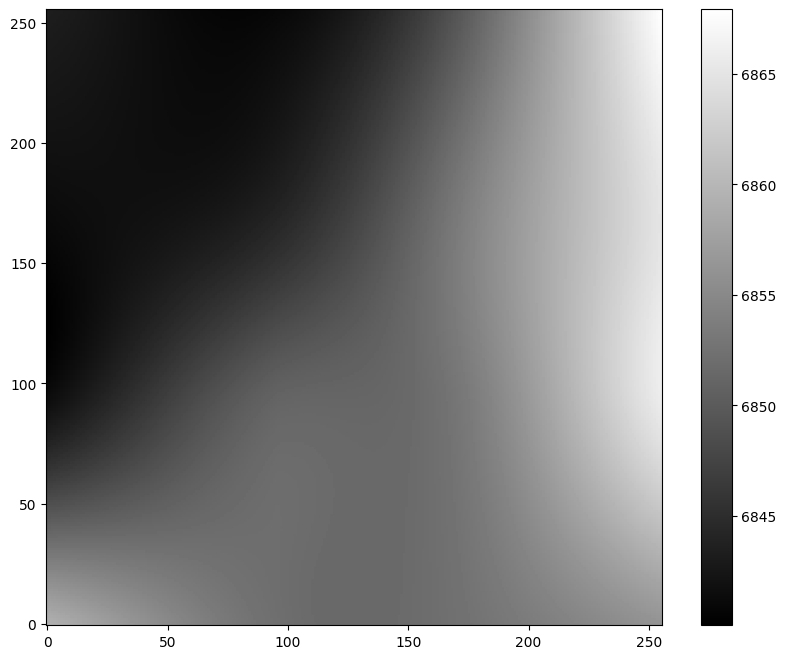

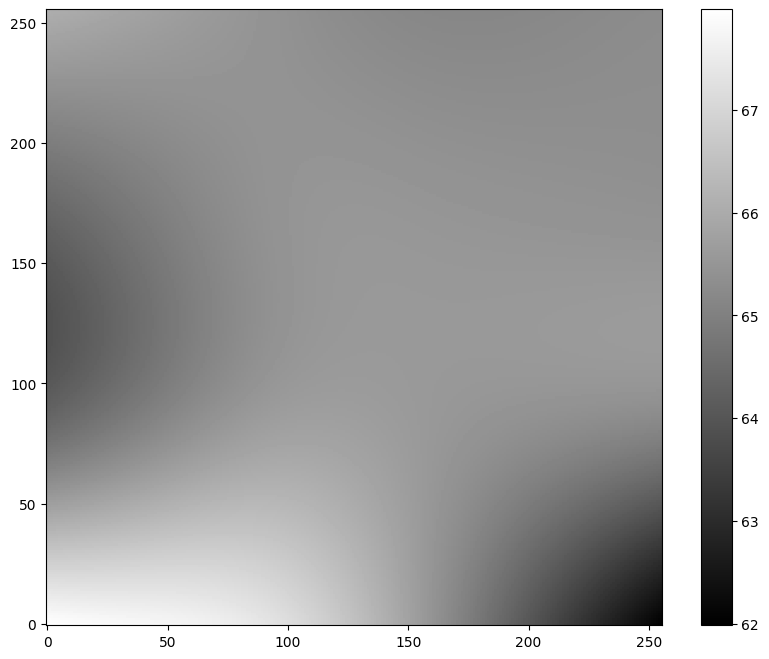

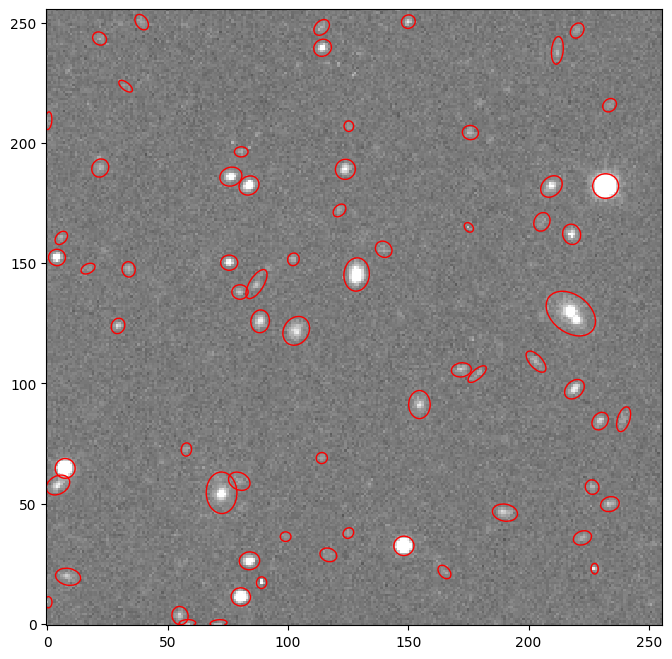

In [18]:
# additional setup for displaying plots
%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

# Read the FITS image using astropy.io.fits
with fits.open("image.fits") as hdulist:
    data = hdulist[0].data

# Display the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()

plt.show()

# Background subtraction
bkg = sep.Background(data)

# Evaluate background as a 2D array
bkg_image = bkg.back()

# Show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.show()
# Evaluate the background noise as a 2D array
bkg_rms = bkg.rms()

# Show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()

plt.show()

# Subtract the background
data_sub = data - bkg

# Object detection
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# Display the detected objects with circles
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

# Plot a circle for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.show()


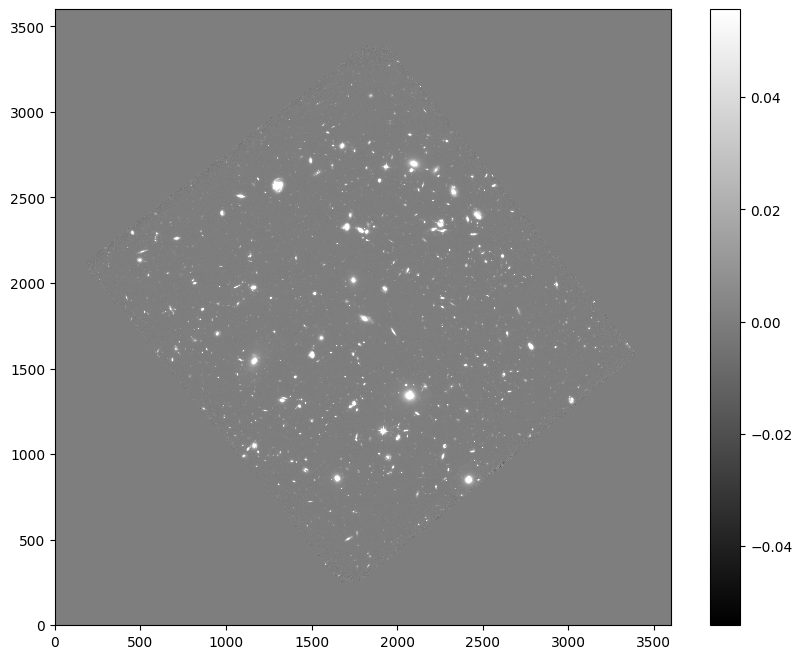

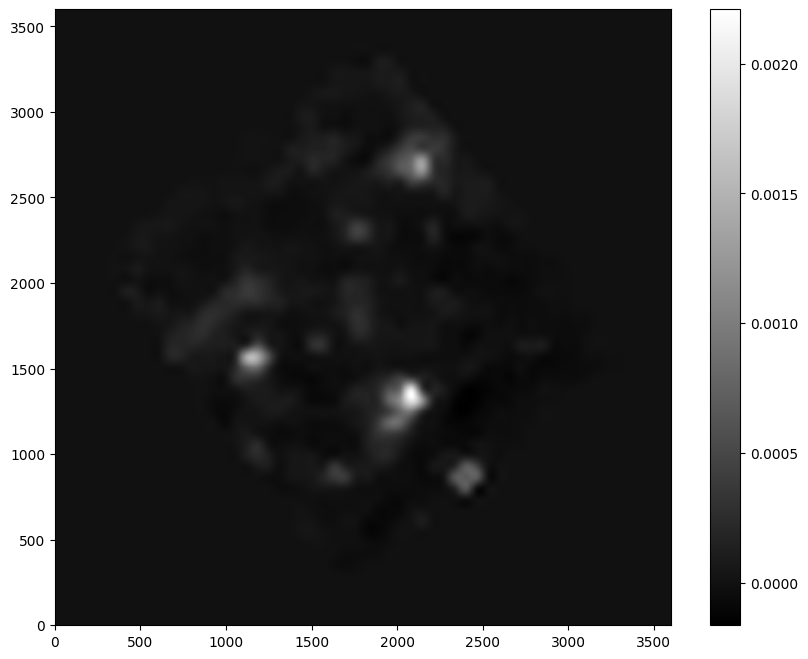

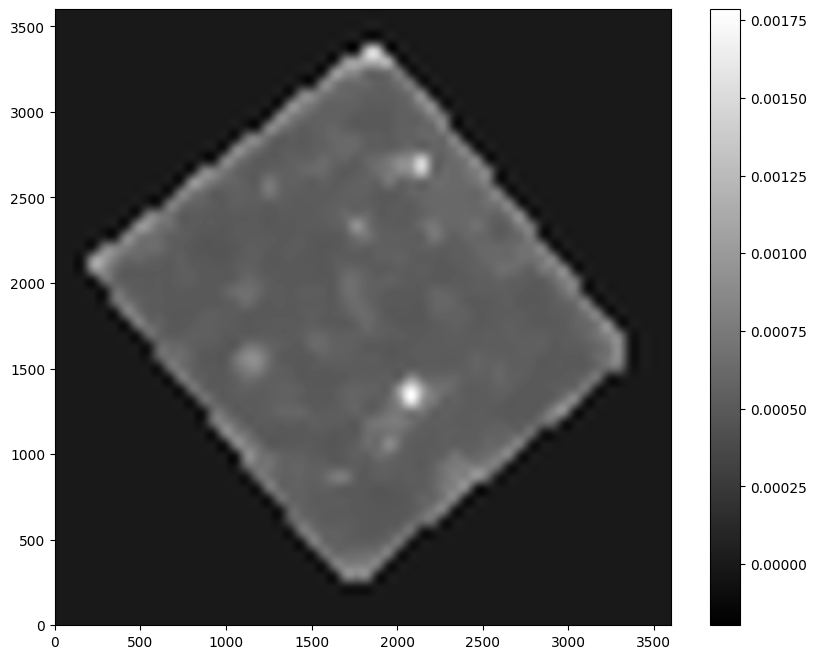

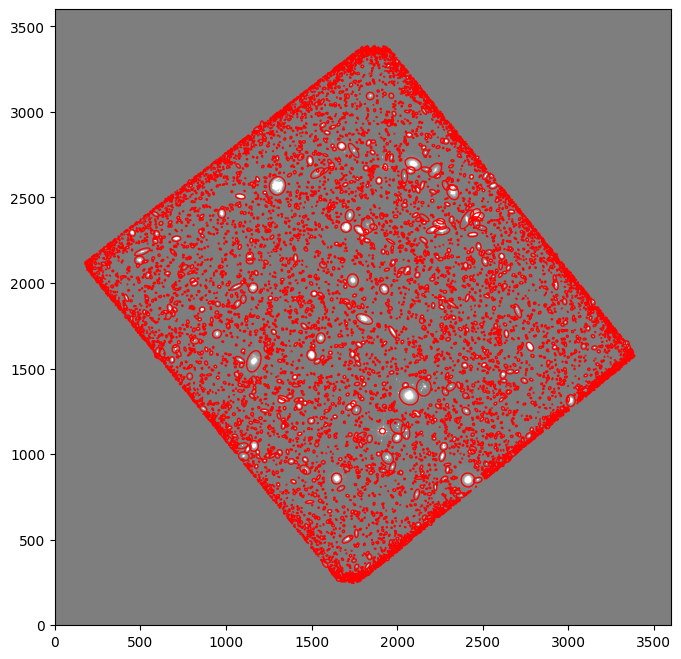

In [22]:
# additional setup for displaying plots
%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

# Read the FITS image using astropy.io.fits
with fits.open("UDF_f105w.fits") as hdulist:
    data = hdulist[0].data

# Display the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()

plt.show()
data = data.byteswap().newbyteorder()
# Background subtraction
bkg = sep.Background(data)

# Evaluate background as a 2D array
bkg_image = bkg.back()

# Show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.show()
# Evaluate the background noise as a 2D array
bkg_rms = bkg.rms()

# Show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()

plt.show()

# Subtract the background
data_sub = data - bkg

# Object detection
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# Display the detected objects with circles
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

# Plot a circle for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.show()